# Ali Abdullah Ahmad
# CWID- 20031246
## Section 3.3 part 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline
import joblib

In [3]:
df = pd.read_csv('C:/Users/abdul/OneDrive/Documents/GitHub/CS559_project/cluster_2.csv')
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Cluster,Bankrupt?,Index
0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,0.303489,0.781491,...,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464,2,0,0
1,0.442500,0.507196,0.494941,0.598906,0.598812,0.998927,0.797298,0.809236,0.303453,0.781484,...,0.598903,0.838903,0.278959,0.026643,0.564335,1,0.032862,2,0,11
2,0.426900,0.488171,0.476899,0.585660,0.585660,0.998796,0.797168,0.809120,0.303500,0.781366,...,0.585660,0.838633,0.275671,0.026791,0.565156,1,0.108067,2,0,62
3,0.427924,0.525294,0.510627,0.603980,0.603980,0.998874,0.797296,0.809292,0.303560,0.781537,...,0.603975,0.839835,0.277661,0.026700,0.564684,1,0.042724,2,0,75
4,0.424950,0.483264,0.471439,0.597328,0.597378,0.998891,0.797281,0.809214,0.303498,0.781461,...,0.597323,0.837883,0.278722,0.026791,0.565158,1,0.034191,2,0,76


In [4]:
df.shape

(421, 98)

In [5]:
index = df['Index']
target = df['Bankrupt?']
cluster = df['Cluster']
X = df.drop(columns=['Index','Bankrupt?','Cluster'])

In [6]:
X.shape

(421, 95)

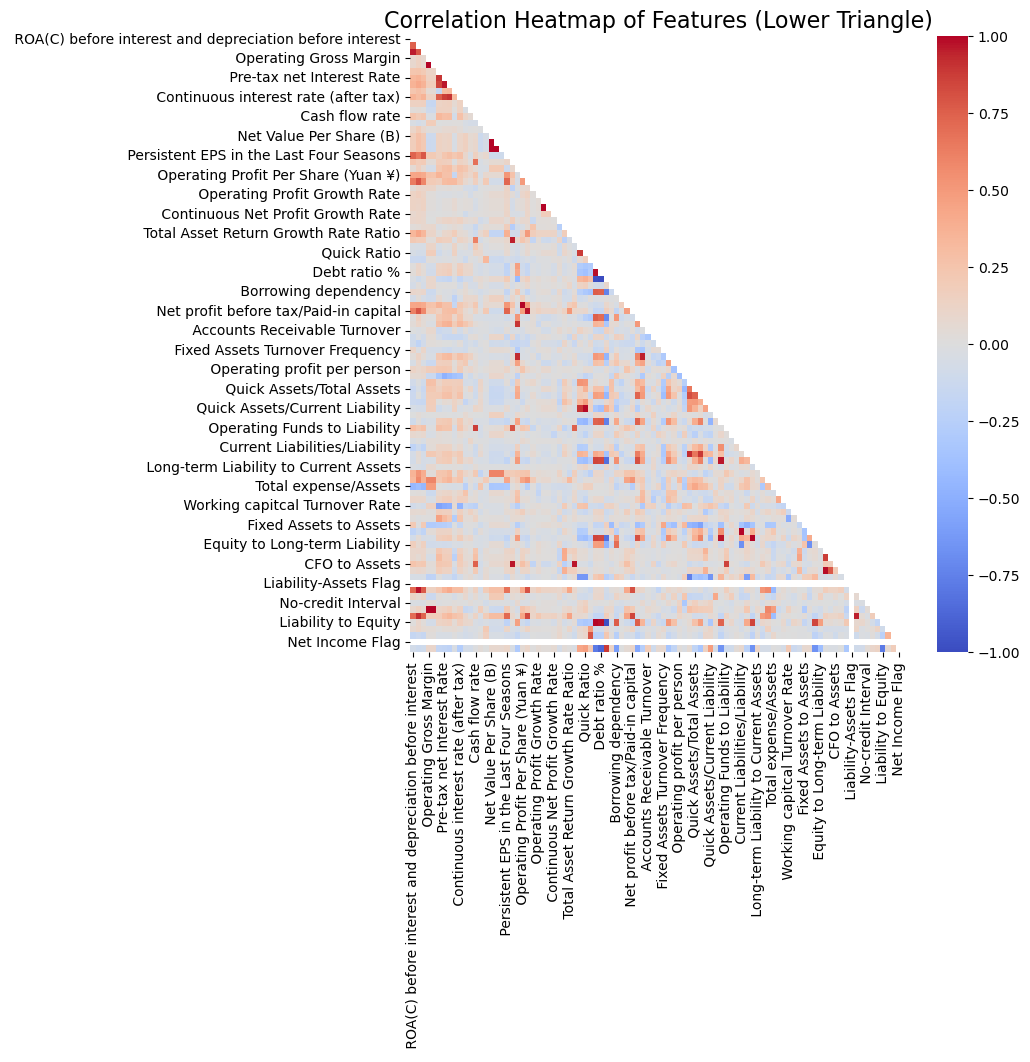

In [7]:
# Compute the correlation matrix
corr = X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features (Lower Triangle)", fontsize=16)
plt.show()

In [8]:
high_corr_f = set()

for j in range(len(corr.columns)):
    for i in range(j):
        if abs(corr.iloc[j,i])>0.95:
            colname = corr.columns[j]
            high_corr_f.add(colname)

df_reduced = X.drop(columns=high_corr_f)

df_reduced.shape

(421, 73)

C:\Users\abdul\AppData\Local\Temp\ipykernel_28748\1713963749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mi Score", y="Feature", data=mi_df, palette="viridis")  # Create a horizontal bar plot


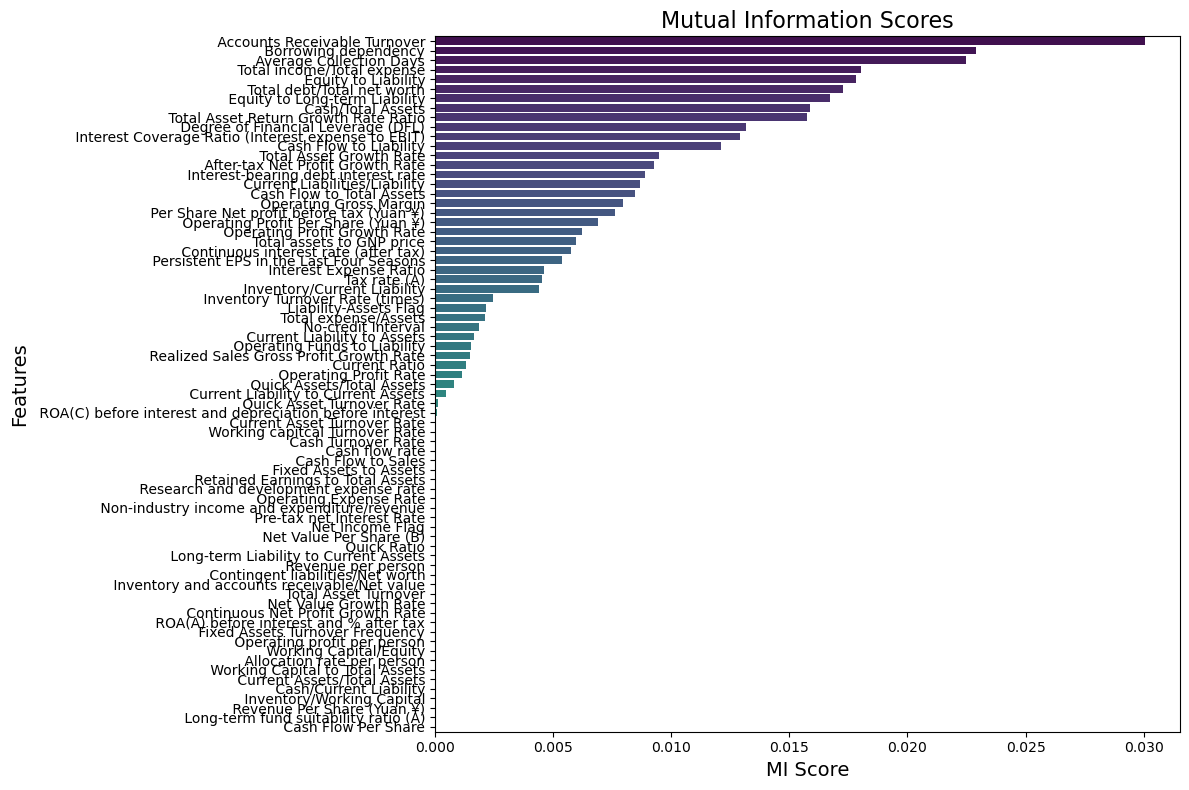

In [9]:
mi_score = mutual_info_classif(df_reduced , target, random_state=42)

mi_df = pd.DataFrame({
    "Feature":df_reduced.columns,
    "Mi Score": mi_score
}).sort_values(by="Mi Score",ascending=False)

# Improved plotting of mutual information scores
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x="Mi Score", y="Feature", data=mi_df, palette="viridis")  # Create a horizontal bar plot
plt.title("Mutual Information Scores", fontsize=16)  # Set the plot title
plt.xlabel("MI Score", fontsize=14)  # Label for the x-axis
plt.ylabel("Features", fontsize=14)  # Label for the y-axis
plt.tight_layout()  # Adjust layout for better fit
plt.show()  # Display the plot

In [10]:
# Display the full mutual information scores DataFrame
pd.set_option('display.max_rows', None)  # Set to display all rows
print(mi_df.sort_values(by="Mi Score", ascending=False))

# Drop rows where "Mi Score" is less than 0.01
mi_01 = mi_df[mi_df["Mi Score"] >= 0.01]

                                              Feature  Mi Score
34                       Accounts Receivable Turnover  0.030034
30                               Borrowing dependency  0.022891
35                            Average Collection Days  0.022499
54                         Total income/Total expense  0.018035
72                                Equity to Liability  0.017842
28                         Total debt/Total net worth  0.017285
62                      Equity to Long-term Liability  0.016712
44                                  Cash/Total Assets  0.015884
24               Total Asset Return Growth Rate Ratio  0.015743
69                 Degree of Financial Leverage (DFL)  0.013163
70   Interest Coverage Ratio (Interest expense to ...  0.012897
64                             Cash Flow to Liability  0.012097
22                            Total Asset Growth Rate  0.009492
20                   After-tax Net Profit Growth Rate  0.009263
10                Interest-bearing debt 

In [11]:
df_01 = df_reduced.drop(columns=[col for col in df_reduced.columns if col not in mi_01["Feature"].values])
df_01.shape

(421, 12)

In [12]:
columns = df_01.columns

print(columns)

Index([' Total Asset Return Growth Rate Ratio', ' Total debt/Total net worth',
       ' Borrowing dependency', ' Accounts Receivable Turnover',
       ' Average Collection Days', ' Cash/Total Assets',
       ' Total income/Total expense', ' Equity to Long-term Liability',
       ' Cash Flow to Liability', ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'],
      dtype='object')


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np


class FeatureSelector2(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        Initialize the feature selector with the column names to be selected.
        
        :param columns: List of column names to select from the DataFrame.
        """
        self.columns = columns
        self.scaler = StandardScaler()  # Create a scaler object
    
    def fit(self, X, y=None):
        """
        Fit the scaler on the selected columns.
        """
        # Select only the columns specified by the user
        X_selected = X[self.columns]
        # Fit the scaler only on the selected columns
        self.scaler.fit(X_selected)
        return self
    
    def transform(self, X):
        """
        Select the specified columns and scale them.
        
        :param X: Input DataFrame.
        :return: Scaled DataFrame with selected columns.
        """
        # Select only the columns specified by the user
        X_selected = X[self.columns]
        # Scale the selected columns
        X_scaled = self.scaler.transform(X_selected)
        
        # Create a DataFrame with the scaled columns and original column names
        X_scaled_df = pd.DataFrame(X_scaled, columns=self.columns, index=X.index)
        return X_scaled_df

In [14]:
base_models = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),  
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42))
]
for name, model in base_models:
    model.fit(df_01, target)
    score = model.score(df_01, target)
    print(f'{name} accuracy: {round(score, 3)}')

# Meta model
meta_model = LogisticRegression(class_weight='balanced', random_state=42)

# Define stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
result = stacked_model.fit(df_01,target).score(df_01,target)
print(f'cv: {round(result,3)}') 

y_pred = stacked_model.predict(df_01)
cm = confusion_matrix(target, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(target, y_pred))

# Calculate acc = TT / (TT + TF) and display TT(TF)
for name, model in base_models:
    y_pred_base = model.predict(df_01)
    cm_base = confusion_matrix(target, y_pred_base)
    TT_base = cm_base[1, 1]
    TF_base = cm_base[1, 0]
    acc_base = TT_base / (TT_base + TF_base) if (TT_base + TF_base) > 0 else 0
    print(f"\n{name} - TT: {TT_base}, TF: {TF_base}, Accuracy (acc) for bankrupt companies: {acc_base:.4f}")

# For meta model
y_pred_meta = stacked_model.predict(df_01)
cm_meta = confusion_matrix(target, y_pred_meta)
TT_meta = cm_meta[1, 1]
TF_meta = cm_meta[1, 0]
acc_meta = TT_meta / (TT_meta + TF_meta) if (TT_meta + TF_meta) > 0 else 0
print(f"\nMeta model - TT: {TT_meta}, TF: {TF_meta}, Accuracy (acc) for bankrupt companies: {acc_meta:.4f}")

rf accuracy: 1.0
gb accuracy: 1.0
dt accuracy: 1.0
cv: 0.969
Confusion Matrix:
 [[396  13]
 [  0  12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       409
           1       0.48      1.00      0.65        12

    accuracy                           0.97       421
   macro avg       0.74      0.98      0.82       421
weighted avg       0.99      0.97      0.97       421


rf - TT: 12, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000

gb - TT: 12, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000

dt - TT: 12, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000

Meta model - TT: 12, TF: 0, Accuracy (acc) for bankrupt companies: 1.0000


In [15]:
import joblib
pipeline = Pipeline([
    ('feature_select', FeatureSelector2(columns)),  # Feature selection step
    ('model', stacked_model)  # Stacking model
])

y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?','Index'])

pipeline.fit(X, y)

joblib.dump(pipeline, 'subgroup_2_model.pkl')

['subgroup_2_model.pkl']